# FUNDING ANALYSIS FOR INDIAN STARTUPS

#### Team: Team Namibia

## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

## Step 1: Business Understanding
Team Namibia is trying to venture into the Indian start-up ecosystem. As the data expert of the team, we are to investigate the ecosystem and propose the best course of action.

#### Problem Statement:
Ideas, creativity, and execution are essential for a start-up to flourish. But are they enough? Investors provide start-ups and other entrepreneurial ventures with the capital---popularly known as "funding"---to think big, grow rich, and leave a lasting impact.

In this project we are investigating the dynamics of startup funding in India over the period from 2018 to 2021. The aim is to understand the trends, sector preferences, investment stages, key investors, and funding Patterns. Additionally, if there have been significant differences in funding amounts across different years and sectors, it can guide the action plan to be taken.

#### Objective
In this analysis we will provide insights into the startup funding landscape in India from 2018 to 2021 by: 
- Identifying trends and patterns in funding amounts over the years.
- Determining which sectors received the most funding and how sector preferences changed over time.
- Understanding the distribution of funding across different stages of startups (e.g., Seed, Series A).
- Identifying key investors and their investment behaviors.
- Analyzing the geographical distribution of funding within India.

#### Analytical Questions
1. What are the trends and patterns in funding amounts for startups in India between 2018 to 2021?
   - Analyzing the annual and quarterly trends in funding can reveal patterns and growth trajectories. Look for peaks, dips, and any consistent growth patterns over these years.(Amount, Year funded)
2. Which industries received the most funding, and how did industry preferences change over time from 2018 to 2021?
   - Identifying which industries or sectors received the most funding can show sectoral preferences and shifts. Understanding how this distribution has evolved over the years can highlight emerging trends and declining interests. (industry, amount, year funded)
3. How is the distribution of funding across different stages of startups (e.g., Seed, Series A)?
   - Analyzing the funding amounts at different startup stages can provide insights into the investment appetite at various growth phases. It can also help in understanding the maturity and risk preference of investors. (stages, Amount)
4. Who are the key investors in Indian startups, and what are their investment behaviors/patterns?
   - Identifying the most active investors and analyzing their investment portfolios can shed light on key players in the ecosystem. Understanding their investment patterns can also reveal strategic preferences and alliances.(Investor, amount, industry, stages)
5. What is the geographical distribution of startup funding within India, and how has this distribution changed over the years 2018 to 2021?
   - Analyzing the geographical distribution of startup funding can show regional hotspots for entrepreneurship and investment. Observing how this has changed over the years can reveal shifts in regional focus and development.(location, year_funded, amount)

Null Hypothesis (H0): There are no significant differences in 
Amount amongst the group(columns) of factors being tested.

Alternative Hypothesis (H1): There are significant differences in 
Amount amongst the group(columns) of factors being tested.

# Step 2: Data Understanding

The data from 2018 is obtained from GitHub in csv format, 2019 data is obtained from google drive in csv format and 2020 to 2021 data is obtained from an SQL database.

## Load Data

#### Install pyodbc and python-dotenv if necessary

In [2]:
# %pip install pyodbc  
# %pip install python-dotenv 

#### Importing the necessary packages 

In [3]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import the numpy library for data manipulation and analysis
import numpy as np

# Import the seaborn library for data visualization
import seaborn as sns


#### Establishing a connection to the SQL database

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the .env file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create the connection string using the retrieved credentials
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


#### Load 2020 & 2021 data

In [5]:
            #----------Load 2020 data----------
# Establish a connection to the database using the connection string
connection = pyodbc.connect(connection_string) 

# Define the SQL query to select all columns from the specified table
query = "Select * from dbo.LP1_startup_funding2020"

# Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
df_2020 = pd.read_sql(query, connection)


In [6]:
           #----------Load 2021 data----------
# Establish a connection to the database using the connection string
connection = pyodbc.connect(connection_string)

# Define the SQL query to select all columns from the specified table
query1 = "Select * from dbo.LP1_startup_funding2020"

# Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
df_2021 = pd.read_sql(query1, connection)


#### Load 2018 & 2019 data

In [7]:
# Load 2018
df_2018 = pd.read_csv(r'C:\Users\Administrator\Desktop\Analysis-of-Indian-Startup-Funding\team namibia\tn dataset\startup_funding2018.csv')

# Load 2019
df_2019 = pd.read_csv(r'C:\Users\Administrator\Desktop\Analysis-of-Indian-Startup-Funding\team namibia\tn dataset\startup_funding2019.csv')


In [8]:
print(df_2018.columns)
print(df_2019.columns)
print(df_2020.columns)
print(df_2021.columns)

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')


#### Rename the columns & Save all the data in one DataFrame

In [9]:
# Rename 2018 column: 'Round/Series' to 'Funding Stage'
df_2018 = df_2018.rename(columns = {'Round/Series': 'Funding Stage'})

# Rename 2019 columns
df_2019 = df_2019.rename(columns = {'Company/Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'Amount($)': 'Amount', 'HeadQuarter': 'Location', 'What it does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2020 columns
df_2020 = df_2020.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})

# Rename 2021 columns
df_2021 = df_2021.rename(columns = {'Company_Brand': 'Company Name', 'Sector': 'Industry', 'Stage': 'Funding Stage', 'HeadQuarter': 'Location', 'What_it_does': 'About Company', 'Founded': 'Year Founded'})



In [10]:
# Add a column to each DataFrame to indicate the year
df_2018['Year Funded'] = 2018
df_2019['Year Funded'] = 2019
df_2020['Year Funded'] = 2020
df_2021['Year Funded'] = 2021

# Concatenate all DataFrames into one master DataFrame
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)


# Print out the new DataFrame to confirm the combination was done correctly
df.head()

,Company Name,Industry,Funding Stage,Amount,Location,About Company,Year Funded,Year Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN


#### Data shape

In [11]:
print("Raw data")
print("2018:", len(df_2018))
print("2019:", len(df_2019))
print("2020:", len(df_2020))
print(f"2021: {len(df_2021)}\n")

print("Joined Data")
print("2018:", len(df[df["Year Funded"]== 2018]))
print("2019:", len(df[df["Year Funded"]== 2019]))
print("2020:", len(df[df["Year Funded"]== 2020]))
print("2021:", len(df[df["Year Funded"]== 2021]))

Raw data
2018: 526
2019: 89
2020: 1055
2021: 1055

Joined Data
2018: 526
2019: 89
2020: 1055
2021: 1055


## Data Quality

- The columns: 'column10', 'Founders' & 'Year Founded' must be removed as they do not help answer our questions.
- Review duplicates.
- The "Company Name" column does not have any may concerns except a few names with ".com", ".ai", ".AI", ".sh" and "+" present.
- In the "Industry" column:
    - "—" must be investgated further using the "About Company" column in order to fill it with the right data.
    - There are companies with multiple industries in a single row, we need to keep only one and remove the rest.
    - We can find the unique values in the column and categorize them under specific industries using "Regular Expression Models".
- There is a link in the "Funding Stage" column at index 178.
    - There is a link as "Funding Stage" 
    - Investigate "NaN" present.
    - Investigate "Undisclosed"
    - Same names are presented differently.
- The "Amount" column (Prescence of "₹", "$", "—" and "Undisclosed"in the column):
    - Extract "₹" to a new column
    - Investigate "NaN"
    - Replace "₹", "$" and "—" with "" in the column
    - Investigate "Undisclosed"
    - Convert the dtype of the column to Int64 as it is in the wrong format.
- In the "Location" column:
    - Investigate "India, Asia"
    - Investigate "NaN"
    - Split the column, keep the 1st one(containing cities), 
        - Join it to the main dataframe "df"
        - Delete the "Location"
        - Rename the newly joined to "Location"
- In the "Investor" column:
    - Investigate "NaN"
    - Split the column

### Data Review

In [12]:
df.shape

(2725, 11)

In [13]:
df.isnull().sum()

Company Name        0
Industry           31
Funding Stage     974
Amount            508
Location          207
About Company       0
Year Funded         0
Year Founded      981
Founders          553
Investor          602
column10         2721
dtype: int64

In [14]:
# Checking columns
df.columns

Index(['Company Name', 'Industry', 'Funding Stage', 'Amount', 'Location',
       'About Company', 'Year Funded', 'Year Founded', 'Founders', 'Investor',
       'column10'],
      dtype='object')

Remove unwanted columns & checking data info

In [15]:
# Dropping unwanted columns
df = df.drop(columns=['column10','Founders','Year Founded'])

# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   2725 non-null   object
 1   Industry       2694 non-null   object
 2   Funding Stage  1751 non-null   object
 3   Amount         2217 non-null   object
 4   Location       2518 non-null   object
 5   About Company  2725 non-null   object
 6   Year Funded    2725 non-null   int64 
 7   Investor       2123 non-null   object
dtypes: int64(1), object(7)
memory usage: 170.4+ KB


In [16]:
# Display the Amount column for further information
pd.set_option('display.max_rows', None)


### Handling Duplicates

In [17]:
# Check for duplicates
df_duplicates= df[df.duplicated(keep = False)].sort_values(by= "Company Name")

# Check for number of duplicates
sum_dups= df.duplicated().sum()

print("Number of duplicates:", sum_dups)

Number of duplicates: 7


In [18]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm the new shape. Rows should be less by 23
df.shape

(2718, 8)

## Data Cleaning

### Rows with multiple columns missing

In [19]:
# Find rows with missing data in the "Amount" and "Funding Stage" columns
double_nulls= df[df['Amount'].isna()& df['Funding Stage'].isna()]

# Drop them from the database
df.drop(double_nulls.index, inplace= True)

# Confirm the new shape. Rows should be less by 282
df.shape

(2438, 8)

In [20]:
df.isna().sum()

Company Name       0
Industry          29
Funding Stage    690
Amount           226
Location         189
About Company      0
Year Funded        0
Investor         587
dtype: int64

### Industry

- Replace "—" with nulls
- Fill the nulls using the column "About Company" as reference
- Extract only one Industry from the 'Industry' column
- Categorize all Industries into Major Industries (Using regular expression)

In [21]:
# Replace "—" with Nulls
df['Industry'] = df['Industry'].replace('—', np.nan)


Fill the nulls using the column "About Company" as reference

In [22]:
# Mapping of company names to industries
company_to_industry = {
    "VMate": "Media and Entertainment",
    "Awign Enterprises": "Services (Human Resources)",
    "TapChief": "Services (Consulting / Professional Services)",
    "KredX": "Financial Services",
    "m.Paani": "E-Commerce",
    "Text Mercato": "E-Commerce",
    "Magicpin": "E-Commerce",
	"Leap Club": "E-Commerce",
	"Juicy Chemistry": "Services",
	"Servify": "Retail",
	"Wagonfly": "Media and Entertainment",
	"DrinkPrime": "E-Commerce",
	"Kitchens Centre": "Consumer Durables",
	"Innoviti": "Services",
	"Brick&Bolt": "Financial Services",
	"Toddle": "Real Estate",
	"HaikuJAM": "IT & BPM",
    "MissMalini Entertainment" : "Entertainment and Media",
    "Jagaran Microfin" : "Microfinance",
    "FLEECA" : "Automotive Services",
    "WheelsEMI" : "Financial Services",
    "Fric Bergen" : "Food and Beverage",
    "Deftouch" : "Gaming",
    "Corefactors" : "Marketing",
    "Cell Propulsion" : "Transportation Technology",
    "Flathalt" : "Real Estate",
    "dishq" : "Food Technology",
    "Trell" : "Social Networking",
    "HousingMan.com" : "Real Estate",
    "Steradian Semiconductors" : "Semiconductor Technology",
    "SaffronStays" : "Travel and Hospitality",
    "Inner Being Wellness" : "Beauty and Wellness",
    "MySEODoc" : "Digital Marketing",
    "ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED" : "Digital Marketing",
    "Scale Labs" : "E-commerce Solutions",
    "Roadcast" : "Business Services",
    "Toffee" : "Insurance Technology",
    "ORO Wealth" : "Financial Services",
    "Finwego" : "Financial Services",
    "Cred" : "Financial Services",
    "Origo" : "Agriculture",
    "Sequretek" : "Cyber Security",
    "Avenues Payments India Pvt. Ltd." : "IT Solutions",
    "Planet11 eCommerce Solutions India (Avenue11)" : "Technology",
    "Iba Halal Care" : "Cosmetics",
    "Togedr" : "Activity Discovery and Booking",
    "Scholify" : "Edutech"    
}

# Function to fill missing industries based on company name
def fill_industry(row):
    if pd.isna(row["Industry"]):
        return company_to_industry.get(row["Company Name"], row["Industry"])
    return row["Industry"]

# Apply the function to update the 'Industry' column
df["Industry"] = df.apply(fill_industry, axis=1)

# Checking the Null value in the 'Industry' column
print("Null values after cleaning:",df['Industry'].isna().sum())    # null values changes from 59 to 0

Null values after cleaning: 0


Extract only one Industry from the 'Industry' column

In [23]:
# Function to extract the first industry from the 'Industry' column
def industry_extract(row):
    industries = row['Industry'].split(',')
    return industries[0].strip() if len(industries) > 1 else row['Industry']

# Apply the function to update the 'Industry' column
df['new_industry'] = df.apply(industry_extract, axis=1)
    
# Remove "Industry"
df = df.drop(columns=['Industry'])

# Rename "new_industry" to "Industry"
df = df.rename(columns={'new_industry': 'Industry'})

df[["Industry"]].head()

,Industry
0,Brand Marketing
1,Agriculture
2,Credit
3,Financial Services
4,E-Commerce Platforms


Categorize all Industries into Major Industries

In [24]:
# Import re library to work with regular expressions 
import re

# Function to categorize the industries into major ones
def sector_redistribution(Industry):
    if re.search(r'bank|fintech|finance|mobile payments|crypto|account|credit|venture|crowd|blockchain|microfinance|lending|wealth|insurance|mutual fund|funding|invest|neo-bank|online financial service|escrow|Financial Service', Industry, re.IGNORECASE):
        return 'Finance and FinTech'
    elif re.search(r'e-?commerce|retail|marketplace|e-store|e-tail|e-tailer|consumer|durables|appliances|electronics', Industry, re.IGNORECASE):
        return 'E-Commerce and Retail'
    elif re.search(r'marketing|advertising|brand|digital marketing|sales|customer loyalty|creative agency|content management', Industry, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'agriculture|agtech|agr[iy]tech|food|beverage|catering|cooking|dairy|nutrition|soil', Industry, re.IGNORECASE):
        return 'Agriculture and Food'
    elif re.search(r'health|medical|biotech|pharma|medtech|care|diagnostics|wellness|fitness|personal care|skincare|mental health|life science|alternative medicine|veterinary', Industry, re.IGNORECASE):
        return 'Healthcare and Wellness'
    elif re.search(r'transport|automotive|vehicle|logistics|delivery|air transport|mobility|car|bike|EV|auto-tech|transportation', Industry, re.IGNORECASE):
        return 'Transportation and Mobility'
    elif re.search(r'real estate|construction|interior|housing|home decor|commercial real estate|co-?working|co-?living', Industry, re.IGNORECASE):
        return 'Real Estate and Construction'
    elif re.search(r'media|entertainment|broadcasting|streaming|video|music|gaming|sports|digital entertainment|visual media', Industry, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'education|e-?learning|edtech|training|continuing education|career planning|edutech', Industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'renewable|clean energy|solar|environmental|energy|cleantech|sanitation', Industry, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'consulting|business services|professional services|customer service|legal|facility|IT & BPM', Industry, re.IGNORECASE):
        return 'Professional Services'
    elif re.search(r'information technology|IT|tech|technology|cloud|internet of things|iot|big data|saas|cyber security|software|ai|machine learning|robotics|deep tech|data science|api|digital|platform|networking|smart cities', Industry, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'consumer goods|consumer applications|consumer durables|consumer electronics|consumer appliances|eyewear|jewellery|fashion', Industry, re.IGNORECASE):
        return 'Consumer Goods'
    elif re.search(r'industrial|manufacturing|automation|industrial automation|packaging', Industry, re.IGNORECASE):
        return 'Industrial and Manufacturing'
    else:
        return Industry
    
# Apply the function to update the 'Industry' column
df['Industry'] = df["Industry"].apply(sector_redistribution)

# Find unique values in the "Industry" column
unique2= df["Industry"].unique()

# Check for number of unique values in the "Industry" column
print(f"Number of unique Industries: {len(unique2)}")       # Unique values changes from 425 to 108


Number of unique Industries: 106


Adding another layer of categorization

In [25]:

def sector2_redistribution(Industry):
    if re.search(r'technology|computer|embedded systems|AR/VR|aero|aerospace|battery', Industry, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'fintech|finance|mobile payments|fraud detection|taxation', Industry, re.IGNORECASE):
        return 'Finance and FinTech'
    elif re.search(r'agriculture|farming|craft beer|dietary supplements|QSR|biomaterial', Industry, re.IGNORECASE):
        return 'Agriculture and Food'
    elif re.search(r'e-?commerce|retail|marketplace|social commerce|online portals|online games|classifieds|news', Industry, re.IGNORECASE):
        return 'E-Commerce and Retail'
    elif re.search(r'healthcare|dental|hygiene|wellness|WL & RAC protection', Industry, re.IGNORECASE):
        return 'Healthcare and Wellness'
    elif re.search(r'media|entertainment|audio|games|reading apps|dating', Industry, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'transportation|mobility|automobile|automobiles', Industry, re.IGNORECASE):
        return 'Transportation and Mobility'
    elif re.search(r'real estate|construction|rental|warehouse|accommodation|home design', Industry, re.IGNORECASE):
        return 'Real Estate and Construction'
    elif re.search(r'energy|environment|battery', Industry, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'marketing|advertising|market research|content marketplace', Industry, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'apps|scanning app|reading apps|dating app', Industry, re.IGNORECASE):
        return 'Apps'
    elif re.search(r'professional services|consultancy|collaboration|service industry', Industry, re.IGNORECASE):
        return 'Professional Services'
    elif re.search(r'industrial|manufacturing|biomaterial', Industry, re.IGNORECASE):
        return 'Industrial and Manufacturing'
    elif re.search(r'artificial intelligence|data analytics|data intelligence|analytics|business intelligence', Industry, re.IGNORECASE):
        return 'Artificial Intelligence'
    elif re.search(r'cosmetics|beauty', Industry, re.IGNORECASE):
        return 'Cosmetics'
    elif re.search(r'internet|search engine|job portal', Industry, re.IGNORECASE):
        return 'Internet'
    elif re.search(r'travel|tourism|business travel', Industry, re.IGNORECASE):
        return 'Travel'
    elif re.search(r'human resources|HR|work fulfillment', Industry, re.IGNORECASE):
        return 'Human Resources'
    elif re.search(r'education', Industry, re.IGNORECASE):
        return 'Education'
    else:
        return Industry
    
# Apply the function to update the 'Industry' column
df['Industry'] = df["Industry"].apply(sector2_redistribution)

# Find unique values in the "Industry" column
unique3 = df["Industry"].unique()

# Check for number of unique values in the "Industry" column
print(f"Number of unique Industries: {len(unique3)}")


Number of unique Industries: 53


### Amount


- Extract "₹" to a new column (To help with dollar conversion)
- Remove "₹", "$", "—" and "Undisclosed" in the column
- Change column dtype to "Int64" and Convert rupees to dollars

In [26]:
# Extract the symbols into new column (currencies)
df['currency'] = df.Amount.str.extract(r'([₹])')


In [27]:
print("'—' in 'Amount':", len(df[df['Amount']=="—"]))
print("Null values in 'Amount':", df['Amount'].isnull().sum())
print("Number of 'Undisclosed' in 'Amount':", len(df[df['Amount']=="Undisclosed"]))

'—' in 'Amount': 148
Null values in 'Amount': 226
Number of 'Undisclosed' in 'Amount': 12


Remove "₹", "$", "—" and "Undisclosed" in the column

In [28]:
# Remove "$", "₹", "—", "," symbols and "Undisclosed" from the 'Amount' column
df['Amount'] = df['Amount'].replace('[$₹,]', '', regex=True)

# Remove empty spaces
# df['Amount']=df['Amount'].str.strip()

# Replace "—" and 'Undisclosed' with Nulls
df['Amount'] = df['Amount'].replace(['—','Undisclosed'], np.nan)

df[['Amount']].head()

,Amount
0,250000
1,40000000
2,65000000
3,2000000
4,NaN


In [29]:
print("'—' in 'Amount':", len(df[df['Amount']=="—"]))
print("Null values in 'Amount':", df['Amount'].isnull().sum())
print("Number of 'Undisclosed' in 'Amount':", len(df[df['Amount']=="Undisclosed"]))

'—' in 'Amount': 0
Null values in 'Amount': 386
Number of 'Undisclosed' in 'Amount': 0


In [30]:
Null_vals= df[df['Amount'].isna()].groupby('Year Funded').count()[['Location']]
print("Null values of years:", Null_vals)

Null values of years:              Location
Year Funded          
2018              148
2019                9
2020              105
2021              105


Change column dtype to "float" and Convert rupees to dollars

In [31]:
# Convert Amount to a numeric column
df['Amount'] = pd.to_numeric(df['Amount'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2724
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2438 non-null   object 
 1   Funding Stage  1748 non-null   object 
 2   Amount         2052 non-null   float64
 3   Location       2249 non-null   object 
 4   About Company  2438 non-null   object 
 5   Year Funded    2438 non-null   int64  
 6   Investor       1851 non-null   object 
 7   Industry       2438 non-null   object 
 8   currency       144 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 190.5+ KB


In [32]:
df[['Amount']].head()


,Amount
0,250000.0
1,40000000.0
2,65000000.0
3,2000000.0
4,NaN


In [33]:
# Filtered rupees
df[df['currency']=="₹"][["Amount"]].head()

,Amount
1,40000000.0
2,65000000.0
6,16000000.0
7,50000000.0
15,100000000.0


In [34]:
            #------------Converted all rupees to dollars------------
# Give the rate a variable
rate = 0.013   # Average rupees to dollars exchange rate from 2018 - 2021

# Filter the data for rows that contains "₹" in the "currency" column
rupees = df[df['currency'] == "₹"]

# Convert all rupees to dollars
df.loc[rupees.index, 'Amount']= rupees['Amount']*rate

df[df['currency']=="₹"][["Amount"]].head()

,Amount
1,520000.0
2,845000.0
6,208000.0
7,650000.0
15,1300000.0


In [35]:
df[["Amount"]].head()

,Amount
0,250000.0
1,520000.0
2,845000.0
3,2000000.0
4,NaN


In [36]:
# Drop the "currency" column
df = df.drop(columns=['currency'])

df.columns

Index(['Company Name', 'Funding Stage', 'Amount', 'Location', 'About Company',
       'Year Funded', 'Investor', 'Industry'],
      dtype='object')

In [37]:
# Fill all null values with zeros
df['Amount'] = df['Amount'].fillna(0) # This only works in the position

df[['Amount']].head()

,Amount
0,250000.0
1,520000.0
2,845000.0
3,2000000.0
4,0.0


### Funding Stage

- Change column casing
- Remove row with link
- Fill nulls with "Undisclosed"
- Categorize similar Funding stages

In [38]:
# Change the case of all rows in the "Funding Stage" column to proper case
df['Funding Stage'] = df['Funding Stage'].str.title()

# Remove the row with the link 
df= df.drop(df[df['Funding Stage'].str.contains('https:', na=False)].index)

# Fill all 974 null values with "Undisclosed"
df['Funding Stage']= df['Funding Stage'].fillna('Undisclosed')

# Print
print("Null values in Funding Stage:",df['Funding Stage'].isna().sum())

Null values in Funding Stage: 0


Categorize Funding stages to their correct names

In [39]:
import re

# Function to categorize the Funding Stage 
def stage_correction(Stage):
    if re.search(r'Angel|Angel Round', Stage, re.IGNORECASE):
        return 'Angel'
    elif re.search(r'Bridge|Bridge Round', Stage, re.IGNORECASE):
        return 'Bridge'
    elif re.search(r'Debt|Debt Financing', Stage, re.IGNORECASE):
        return 'Debt Financing'
    elif re.search(r'Fresh Funding|Funding Round', Stage, re.IGNORECASE):
        return 'Funding Round'
    elif re.search(r'Pre Seed Round|Pre-Seed|Pre-Seed Round', Stage, re.IGNORECASE):
        return 'Pre-Seed'
    elif re.search(r'Pre Series A|Pre- Series A|Pre-Series|Pre-Series A|Pre-Series A1', Stage, re.IGNORECASE):
        return 'Pre-Series A'
    elif re.search(r'Pre Series B|Pre-Series B', Stage, re.IGNORECASE):
        return 'Pre-Series B'
    elif re.search(r'Seed|Seed A|Seed Fund|Seed Funding|Seed Investment|Seed Round', Stage, re.IGNORECASE):
        return 'Seed Round'
    elif re.search(r'Pre Series C|Pre-Series C', Stage, re.IGNORECASE):
        return 'Pre-Series C'
    elif re.search(r'Series A|Series A-1', Stage, re.IGNORECASE):
        return 'Series A'
    elif re.search(r'Series B|Series B+', Stage, re.IGNORECASE):
        return 'Series B'
    elif re.search(r'Series D|Series D1', Stage, re.IGNORECASE):
        return 'Series D'
    else:
        return Stage
    
# Apply the function to update the 'Industry' column
df['Funding Stage'] = df['Funding Stage'].apply(stage_correction)

# Find unique values in the "Industry" column
unique3= df["Funding Stage"].unique()

# Check for number of unique values in the "Industry" column
print(f"Number of unique Stages: {len(unique3)}")         # unique values changes from 50 to 30

Number of unique Stages: 30


### Investor

In [40]:
# Fill nulls with "Unknown"
df['Investor']= df['Investor'].fillna("Unknown")

# Split the column
investor_split = df['Investor'].str.rsplit(',', expand=True)

# Drop all columns except for "0" and "1"
investor_split= investor_split.drop(investor_split.columns[2:], axis=1)

# Assign new column names to the splits
investor_split.columns = ['Investor_1', 'Investor_2']

# Strip both columns of spaces
investor_split["Investor_1"]= investor_split["Investor_1"].str.strip()
investor_split["Investor_2"]= investor_split["Investor_2"].str.strip()

# Fill the nulls of investor_2 with "Unknown"
investor_split["Investor_2"]= investor_split["Investor_2"].fillna("Unknown")

# Join the investor_split to the existing dataset and delete the Investor column
df= df.join(investor_split).drop("Investor", axis=1)

df.head()

,Company Name,Funding Stage,Amount,Location,About Company,Year Funded,Industry,Investor_1,Investor_2
0,TheCollegeFever,Seed Round,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Marketing and Advertising,Unknown,Unknown
1,Happy Cow Dairy,Seed Round,520000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Agriculture and Food,Unknown,Unknown
2,MyLoanCare,Series A,845000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Finance and FinTech,Unknown,Unknown
3,PayMe India,Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Finance and FinTech,Unknown,Unknown
4,Eunimart,Seed Round,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,E-Commerce and Retail,Unknown,Unknown


### Location

- Exctract cities from the column & Correct all Typos
- Fill nulls based on research at "pitchbook.com" and "crunchbase.com
- Filter out Cities that are not located in India
- Impute missing values of the unfound Locations of companies with "Unknown"

In [41]:
# Extracting the first part of the 'Location' column after splitting by a comma. e.g the selection of the city
df['Location'] = df['Location'].str.split(pat=',').str[0]

# Dictionary of replacements to correct the typos for some locations
replacements = {
    'Banglore': 'Bengaluru',
    'Small Towns': 'Andhra Pradesh',
    'Gurugram\t#REF!': 'Gurugram',
    'Samsitpur': 'Bengaluru',
    'Telugana': 'Hyderabad',
    'Orissia': 'Bengaluru',
    'Bangalore City': 'Bengaluru',
    'Uttar pradesh': 'Uttar Pradesh'
}

# Replace typos in the 'Location' column with the correct names
df['Location'] = df['Location'].replace(replacements)

Research was done using "pitchbook.com" and "crunchbase.com" to discover the location of these startups (with missing values) and inpute their location into the dataframe.

Fill nulls based on research at "pitchbook.com" and "crunchbase.com

In [42]:

# Dictionary mapping company names to locations for companies where Location was the only column missing
company_to_location = {
    'Habitat': 'Chennai',
    'Raskik': 'Gurugram',
    'Otipy': 'Gurugram',
    'Daalchini': 'Noida',
    'Bijnis': 'New Delhi',
    'Oziva': 'Mumbai',
    'Jiffy ai': 'Bengaluru',
    'Juicy Chemistry': 'Coimbatore',
    'Shiprocket': 'Gurugram',
    'Phable': 'Bengaluru',
    'NIRA': 'Bengaluru',
    'Setu': 'Bengaluru',
    'Zupee': 'Gurugram',
    'DeHaat': 'Patna',
    'CoinDCX': 'Mumbai',
    'Smart Coin': 'Bengaluru',
    'Shop101': 'Mumbai',
    'Neeman': 'Hyderabad',
    'SmartVizX': 'Noida',
    'Onsitego': 'Mumbai',
    'HempStreet': 'Delhi',
    'Classplus': 'Noida',
    'Fleetx': 'Gurugram',
    'Oye! Rickshaw': 'Delhi',
    'MoneyTap': 'Bengaluru',
    'LogiNext': 'Mumbai',
    'Skylo': 'Bengaluru',
    'Samya AI': 'Bengaluru',
    'Kristal AI': 'Bengaluru',
    'Invento Robotics': 'Bengaluru',
    'Teach Us': 'Mumbai',
    'Phenom People': 'Hyderabad',
    'TechnifyBiz': 'Delhi',
    'Klub': 'Bengaluru',
    'Techbooze': 'Delhi',
    'Testbook': 'Gurugram',
    'Mamaearth': 'Gurugram',
    'EpiFi': 'Bengaluru',
    'Vidyakul': 'Gurugram',
    'Pristyn Care': 'Gurugram',
    'Springboard': 'Bengaluru',
    'Bijak': 'Gurugram',
    'Rivigo': 'Gurugram',
    'Cubical Labs': 'Delhi'
}

# Function to fill location based on company name
def update_location(row):
    if row['Company Name'] in company_to_location:
        return company_to_location[row['Company Name']]
    return row['Location']

# Apply the function on the location column
df['Location'] = df.apply(update_location, axis=1)



Filter out Cities that are not located in India

In [43]:

# List of cities that are not located in India
non_indian_cities = [
    "Singapore", "Frisco", "California", "New York", "San Francisco", "San Ramon",
    "Paris", "Plano", "Sydney", "San Francisco Bay Area", "Bangaldesh", "London",
    "Milano", "Palmwoods", "France", "Irvine", "Newcastle Upon Tyne", "Shanghai",
    "Jiaxing", "San Franciscao", "Tangerang", "Berlin", "Seattle", "Riyadh", "Seoul",
    "Bangkok", "Hyderebad", "Computer Games", "Food & Beverages", "Pharmaceuticals #REF!",
    "Beijing", "Santra", "Mountain View", "Online Media #REF!", "Information Technology & Services"
]

# Filter the dataframe to exclude rows with cities that do not belong
df = df[~df['Location'].isin(non_indian_cities)]


In [44]:
# Impute missing values in the Location column with Unknown
df['Location'].fillna('Unknown', inplace=True)

# Resetting the DataFrame index
df = df.reset_index(drop=True)

df.head()

,Company Name,Funding Stage,Amount,Location,About Company,Year Funded,Industry,Investor_1,Investor_2
0,TheCollegeFever,Seed Round,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Marketing and Advertising,Unknown,Unknown
1,Happy Cow Dairy,Seed Round,520000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Agriculture and Food,Unknown,Unknown
2,MyLoanCare,Series A,845000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,Finance and FinTech,Unknown,Unknown
3,PayMe India,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Finance and FinTech,Unknown,Unknown
4,Eunimart,Seed Round,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,E-Commerce and Retail,Unknown,Unknown


## Hypothesis Testing

In [45]:
# Strip all columns of spaces and converting them to category
df['Company Name'] = df['Company Name'].str.strip().astype('category')
df['Funding Stage'] = df['Funding Stage'].str.strip().astype('category')
df['Location'] = df['Location'].str.strip().astype('category')
df['Industry'] = df['Industry'].str.strip().astype('category')
df['Investor_1'] = df['Investor_1'].str.strip().astype('category')
df['Investor_2'] = df['Investor_2'].str.strip().astype('category')

# Replace spaces in column names with "_"
df.columns = df.columns.str.replace(' ', '_')


In [46]:
# hypothesis: Amount

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define thresholds
threshold = 0.05

# Perform ANOVA for each factor
factors = ['Company_Name','Funding_Stage','Location','Industry','Investor_1','Investor_2']
p_values = {}

for factor in factors:
    model = ols('Amount ~ {}'.format(factor), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    p_value_decimal= round(float(p_value),2)
    print(p_value_decimal)

    # Add p-value to dictionary
    p_values[factor] = p_value_decimal

    # # Identify significant factors with p-values below the threshold
    significant_factors= [factor for factor, p_values in p_values.items() if p_values < threshold]
print("Significant factors with p-values below {}: {}".format(threshold, significant_factors))


0.0
1.0
1.0
1.0
0.0
0.0
Significant factors with p-values below 0.05: ['Company_Name', 'Investor_1', 'Investor_2']


In [47]:
df.describe()

,Amount,Year_Funded
count,2.354000e+03,2354.000000
mean,7.692134e+07,2019.885726
std,2.041318e+09,1.134451
min,0.000000e+00,2018.000000
25%,2.920000e+05,2019.000000
50%,1.500000e+06,2020.000000
75%,7.500000e+06,2021.000000
max,7.000000e+10,2021.000000


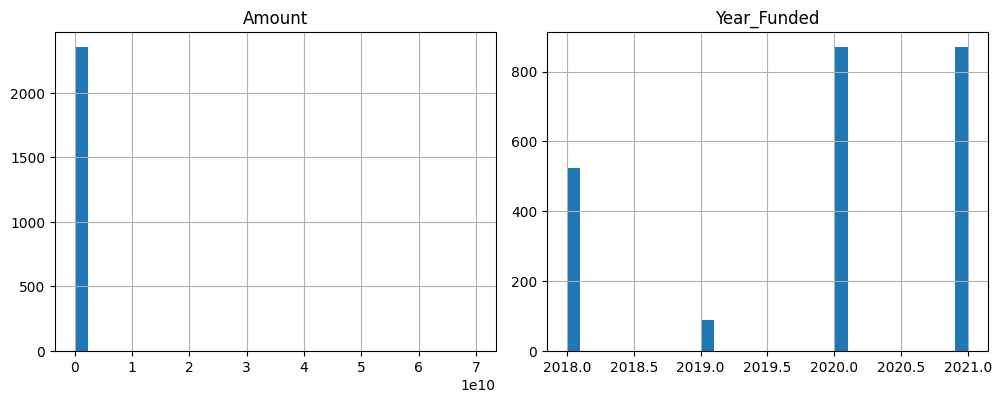

In [48]:
import matplotlib.pyplot as plt

# Generating histograms
df.hist(
    figsize=(15, 15),
    layout=(4, 3),
    bins=30
)

plt.tight_layout()
plt.show()

# Step 3: EDA

## "0"s in amount

In [49]:
print("Total number of data:", len(df["Amount"]))
print("Total number of nulls:", len(df[df["Amount"]<1]))

Total number of data: 2354
Total number of nulls: 382


In [50]:
print("Total nulls/'0' present:", len(df[df["Amount"]<=0]))

Total nulls/'0' present: 382


In [51]:
funded_companies= df[df["Amount"]==0.0]

funded_companies_year= funded_companies.groupby(by="Year_Funded")[["Amount"]].count()
print("Nulls in each yeah:", funded_companies_year)

Nulls in each yeah:              Amount
Year_Funded        
2018            148
2019             12
2020            111
2021            111


In [52]:
avg_funds_yearly= df[df["Amount"]>0]
print("Filled Amount:", len(avg_funds_yearly))

Filled Amount: 1972


In [53]:
df_2020.head()

,Company Name,Year Founded,Location,Industry,About Company,Founders,Investor,Amount,Funding Stage,column10,Year Funded
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


## Q1
What are the trends and patterns in funding amounts for startups in India between 2018 to 2021?

In [54]:
# Group companies that were funded by years
years_of_funding= df[df["Amount"]>0].groupby(by="Year_Funded").Amount.count()
years_of_funding

Year_Funded
2018    377
2019     77
2020    759
2021    759
Name: Amount, dtype: int64

In [55]:
years_of_funding_df= pd.DataFrame(years_of_funding).reset_index()

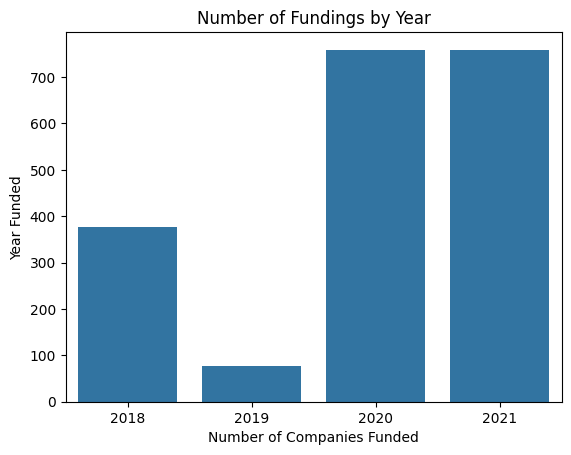

In [56]:
# Reset index to convert Series to DataFrame for plotting
#years_of_funding = years_of_funding.reset_index()

# Plot horizontal bar chart
sns.barplot(x='Year_Funded', y='Amount', data=years_of_funding_df)
plt.xlabel('Number of Companies Funded')
plt.ylabel('Year Funded')
plt.title('Number of Fundings by Year')

plt.show()

The year 2020 & 2021 recieved the most fundings as compaired to the other years

## Q2
Which Industries received the most funding, and how did industry preferences change over time from 2018 to 2021?

#### Overall Highly funded(sum) and Most funded(count) Industry

In [57]:
#----------Calculate for Overall sum#----------
# Calculate the total sum of fundings for each Industry
top_5_industries_sum=  df.groupby(by= "Industry")[["Amount"]].sum()
top_5_industries_sum_sorted= top_5_industries_sum.sort_values(by= "Amount", ascending=False).head(5)

print(f"Top 5 Highly funded Industries:\n", top_5_industries_sum_sorted)

#----------Calculate for Overall count#----------
# Find the top 5 industries that received most funding across the years
industry_grouped= df.groupby(by= "Industry")[["Company_Name"]]

# Calculate the count of the industries
top_5_industries_count= industry_grouped.count().sort_values(by= "Company_Name", ascending=False).head(5)

print(f"\nTop 5 most funded Industries:\n", top_5_industries_count)


print(f"\n The 'E-Commerce and Retail' industry got the highest amount of funds, While the Technology industry got the most attention.")



Top 5 Highly funded Industries:
                              Amount
Industry                           
E-Commerce and Retail  1.440348e+11
Finance and FinTech    7.013818e+09
Education              5.660362e+09
Technology             5.042417e+09
Agriculture and Food   4.955097e+09

Top 5 most funded Industries:
                          Company_Name
Industry                             
Technology                        407
Finance and FinTech               381
Agriculture and Food              252
Education                         219
Healthcare and Wellness           214

 The 'E-Commerce and Retail' industry got the highest amount of funds, While the Technology industry got the most attention.


##### Charts

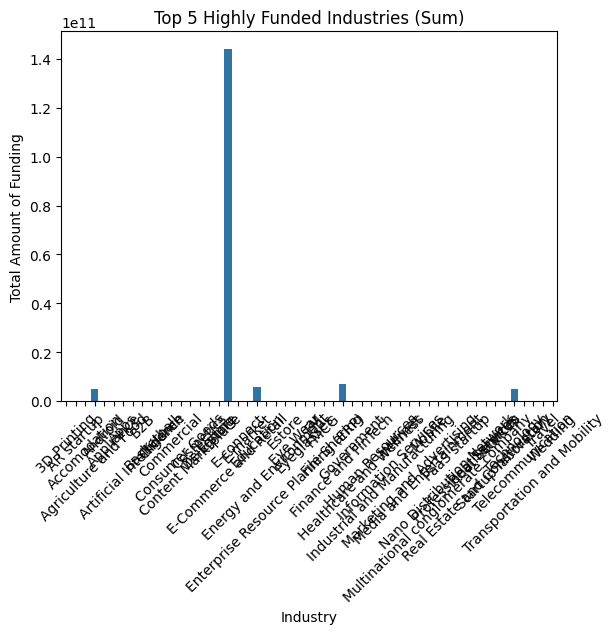

In [58]:

            #-----------------Chart Representation-------------------
#------Overall Sum-------
# Reset index to convert Series to DataFrame for plotting
top_5_industries_sum_sorted = top_5_industries_sum_sorted.reset_index()

# Plot horizontal bar chart
sns.barplot(x='Industry', y='Amount', data=top_5_industries_sum_sorted)
plt.xlabel('Industry')
plt.ylabel('Total Amount of Funding')
plt.title('Top 5 Highly Funded Industries (Sum)')
plt.xticks(rotation=45)
plt.show()


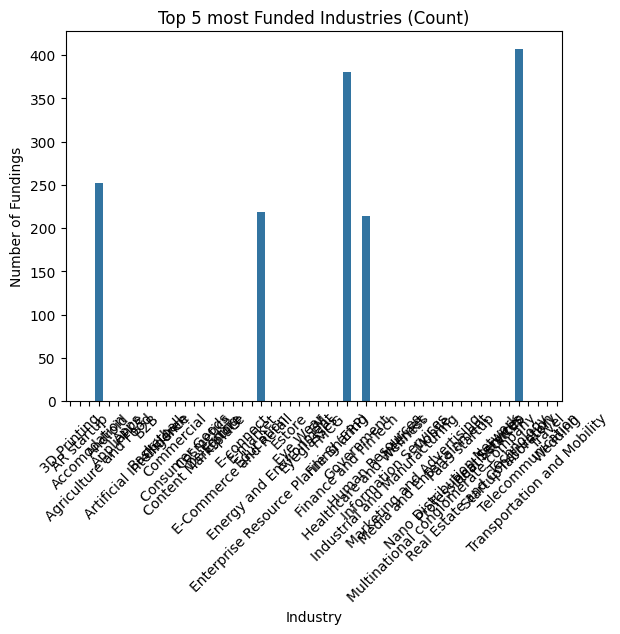

In [59]:

# Reset index to convert Series to DataFrame for plotting
top_5_industries_count = top_5_industries_count.reset_index()

# Plot horizontal bar chart
sns.barplot(x='Industry', y='Company_Name', data=top_5_industries_count)
plt.xlabel('Industry')
plt.ylabel('Number of Fundings')
plt.title('Top 5 most Funded Industries (Count)')
plt.xticks(rotation=45)
plt.show()

#### By year

In [60]:
    #------------Highly Funded industry by year (Sum)------------
# Calculate the total sum of fundings for each year
yearly_industry_sum= df.groupby(by= ["Year_Funded","Industry"])[["Amount"]].sum()

# Sort them by "Amount" and "Year_Funded"
yearly_industry_sum_sorted= yearly_industry_sum.sort_values(by= ["Amount","Year_Funded"], ascending=False)

# Get the first industry with the highest funding amount for each year
top_industry_per_year = yearly_industry_sum_sorted.groupby(level=0).head(1)

# Sort the list in ascending order
sorted_top_industry_per_year= top_industry_per_year.sort_values(by="Year_Funded", ascending=True)


    
    #------------Most Funded industry by year (Count)------------
# Calculate the total sum of fundings for each year
yearly_industry_count= df.groupby(by= ["Year_Funded","Industry"])[["Amount"]].count()

# Sort them by "Amount" and "Year_Funded"
yearly_industry_count_sorted= yearly_industry_count.sort_values(by= ["Amount","Year_Funded"], ascending=False)

# Get the first industry with the highest funding amount for each year
top_industry_per_year_count = yearly_industry_count_sorted.groupby(level=0).head(1)

# Sort the list in ascending order
top_industry_per_year_count= top_industry_per_year_count.sort_values(by="Year_Funded", ascending=True)


# Print out the list
print("\nHighly Funded(Sum) industry by year:", sorted_top_industry_per_year)
print("\n\nMost Funded(Count) industry by year:", top_industry_per_year_count)



Highly Funded(Sum) industry by year:                                          Amount
Year_Funded Industry                           
2018        Finance and FinTech    1.726476e+09
2019        Technology             1.080280e+09
2020        E-Commerce and Retail  7.171919e+10
2021        E-Commerce and Retail  7.171919e+10


Most Funded(Count) industry by year:                                  Amount
Year_Funded Industry                   
2018        Finance and FinTech      87
2019        Technology               21
2020        Technology              166
2021        Technology              166


##### Charts

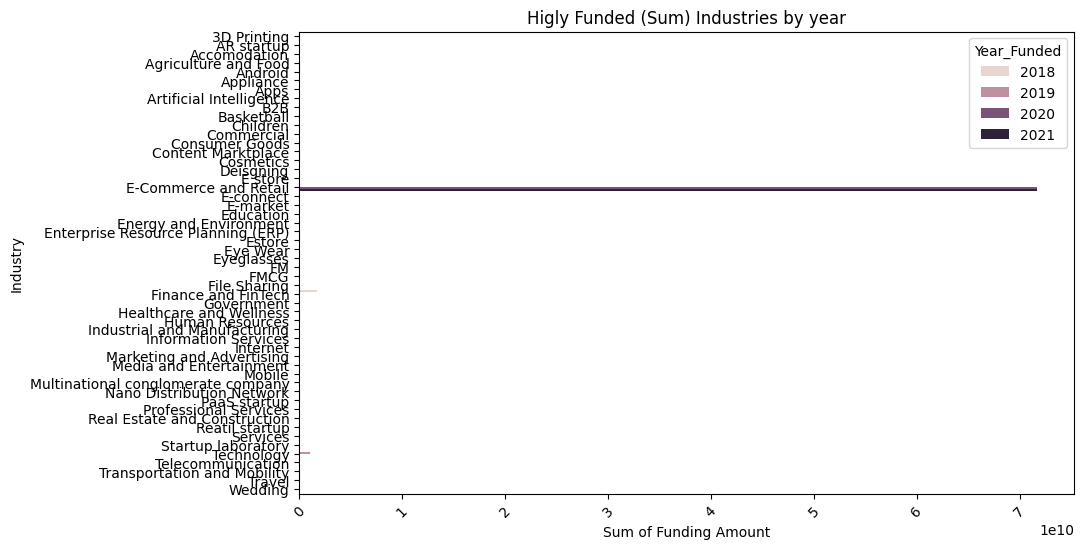

In [61]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Industry', hue='Year_Funded', data=sorted_top_industry_per_year)

plt.xlabel('Sum of Funding Amount')
plt.ylabel('Industry')
plt.title('Higly Funded (Sum) Industries by year')
plt.xticks(rotation=45)
plt.show()

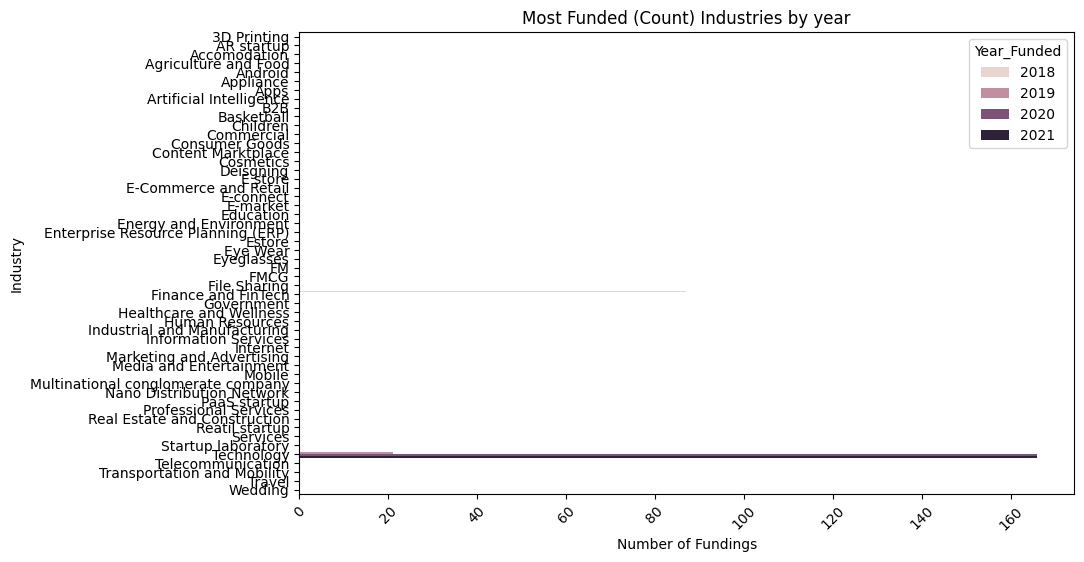

In [62]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Industry', hue='Year_Funded', data=top_industry_per_year_count)

plt.xlabel('Number of Fundings')
plt.ylabel('Industry')
plt.title('Most Funded (Count) Industries by year')
plt.xticks(rotation=45)
plt.show()

## Q3
A- Which Industries received the most funding? 

B- How did industry preferences change over time from 2018 to 2021?

## Q4
A- Who are the key investors in Indian startups?

B- What are their investment behaviors/patterns?


## Q5
A- What is the geographical distribution of startup funding within India?

B- how has this distribution changed over the years 2018 to 2021?

In [63]:
# Construct a histogram to visualize the number of startups in each Location
startup_count_per_hq = df.groupby('Location').size().reset_index(name='Startup Count')

# Sort the DataFrame by 'Startup Count' in descending order
startup_count_per_hq_sorted = startup_count_per_hq.sort_values(by='Startup Count', ascending=False)
startup_count_per_hq_sorted=startup_count_per_hq_sorted.head(10)[::-1]

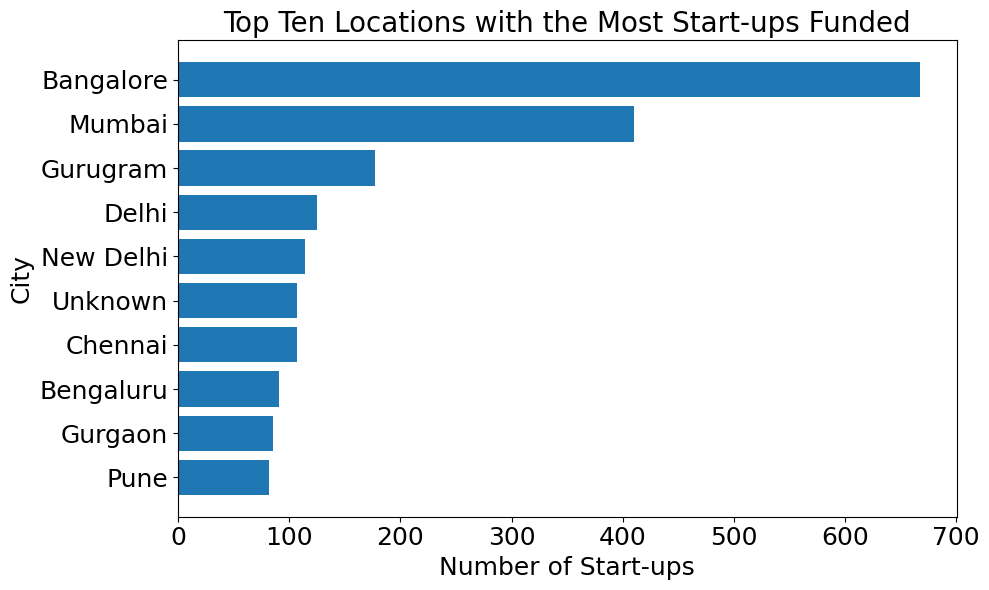

In [64]:
# Create the bar chart 
plt.figure(figsize=(10, 6))
plt.barh(startup_count_per_hq_sorted['Location'],startup_count_per_hq_sorted['Startup Count'])
# Add labels and title
plt.xlabel('Number of Start-ups', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.title('Top Ten Locations with the Most Start-ups Funded', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
# Display the plot
plt.show()

In [66]:

# Aggregating data by 'City' and 'Year'
funding_by_city_year = df.groupby(['Location', 'Year'])['Amount'].sum().unstack().fillna(0)


# Analyzing changes over the years
funding_by_city_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Changes in Geographical Distribution of Startup Funding (2018-2021)')
plt.xlabel('City')
plt.ylabel('Total Funding Amount')
plt.legend(title='Year')
plt.show()